In [1]:
import pandas as pd
from nsepy import get_history as gh
import datetime as dt

D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
stk_data = pd.read_csv("Tatacoffee13_21.csv")
stk_data['Date'] = pd.to_datetime(stk_data['Date'])
start_date = dt.datetime(2021, 9, 1)
end_date = dt.datetime(2022, 2, 4)
filtered_data = stk_data[(stk_data['Date'] >= start_date) & (stk_data['Date'] <= end_date)]
print(filtered_data)

           Date    Open    High     Low   Close
2144 2021-09-01  214.00  214.25  207.90  211.10
2145 2021-09-02  211.90  213.75  208.70  209.50
2146 2021-09-03  210.00  211.25  206.40  207.60
2147 2021-09-06  207.60  209.50  203.20  204.10
2148 2021-09-07  211.35  217.00  209.60  212.45
...         ...     ...     ...     ...     ...
2220 2021-12-22  202.90  207.80  201.35  205.00
2221 2021-12-23  206.00  206.85  202.05  202.95
2222 2021-12-24  203.90  203.90  199.35  201.00
2223 2021-12-27  200.00  222.00  196.00  218.35
2224 2021-12-28  219.65  220.45  211.55  212.35

[81 rows x 5 columns]


In [3]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (2225, 1)


In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR
import pandas as pd

def rmsemape(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mape

# Assuming you have two time series: data1 and data2
# data1 and data2 should be numpy arrays or pandas Series/DataFrames
data1 = np.array([1, 2, 3, 4, 5])  # Replace with your actual data for data1
data2 = np.array([10, 20, 30, 40, 50])  # Replace with your actual data for data2

# Constructing a DataFrame with appropriate index
index = pd.date_range(start='2023-01-01', periods=len(data1), freq='D')  # Adjust the date range as needed
data = pd.DataFrame({'data1': data1, 'data2': data2}, index=index)

orders = [1, 2, 3]

for i in orders:
    # Fit the VAR model
    model = VAR(data)
    model_fit = model.fit(i)
    
    # Make predictions for the entire dataset
    y_pred = model_fit.forecast(data.values, len(data))
    
    # Extract the predictions for data1
    y_pred_data1 = y_pred[:, 0]
    
    # Calculate RMSE and MAPE
    rmse, mape = rmsemape(data1, y_pred_data1)
    print(f"Order={i}, RMSE={rmse:.2f}, MAPE={mape:.2f}%")



Order=1, RMSE=5.00, MAPE=228.33%
Order=2, RMSE=5.00, MAPE=228.33%
Order=3, RMSE=5.00, MAPE=228.33%


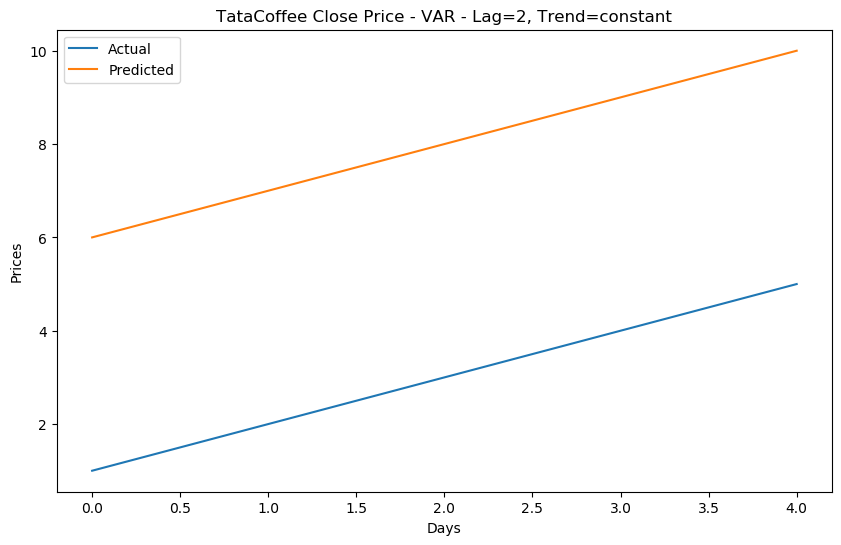

In [11]:
import matplotlib.pyplot as plt
i = 2
td = "constant"
plt.figure(figsize=(10, 6))
plt.plot(data1, label='Actual')
plt.plot(y_pred_data1, label='Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - VAR - Lag={}, Trend={}'.format(i, td))
plt.legend()
plt.show()

In [12]:
len(data1)

5

In [15]:
actual_stock_price_test_ori = np.array([[100], [110], [105], [95]])
actual_stock_price_test_ori_flat = actual_stock_price_test_ori.flatten()
actual_stock_price_test_oriA = pd.DataFrame({'Close': actual_stock_price_test_ori_flat})
y_pred = np.array([90, 100, 95, 105])  
predicted_stock_price_test_oriP = pd.DataFrame({'Close': y_pred})
if not predicted_stock_price_test_oriP.empty:
    predicted_stock_price_test_oriP[['Close']] = Ms.inverse_transform(predicted_stock_price_test_oriP[['Close']])


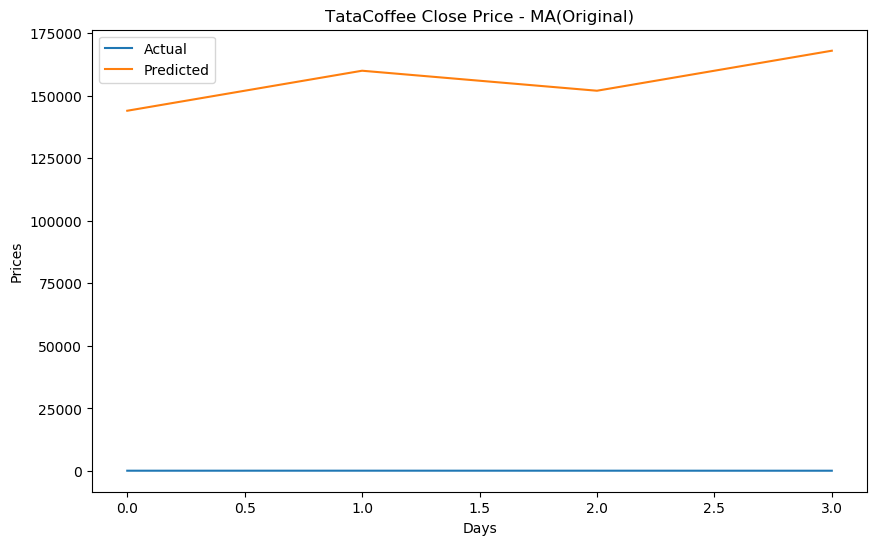

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(actual_stock_price_test_oriA['Close'], label='Actual')
plt.plot(predicted_stock_price_test_oriP['Close'], label='Predicted')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - MA(Original)')
plt.legend()
plt.show()


In [17]:
def rmsemape(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return rmse, mape

rmse, mape = rmsemape(actual_stock_price_test_oriA, predicted_stock_price_test_oriP)


In [20]:
model_fit = model.fit(i)
forecast = model_fit.forecast(model_fit.y, steps=2)
y_pred_data1 = forecast[:, 0]


D:\ANACONDA\ANA\envs\aiworks\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [21]:
forecast

array([[ 6., 60.],
       [ 7., 70.]])

In [23]:

forecast = model_fit.forecast(model_fit.y, steps=2)

y_pred_data1 = forecast[:, 0]

forecast_index = pd.date_range(start='2023-01-01', periods=2, freq='D')


fTestNormTable = pd.DataFrame({'Closefore': y_pred_data1}, index=forecast_index)


Ms.fit(fTestNormTable[['Closefore']].values.reshape(-1, 1))

forecast_stock_price_test_ori = Ms.inverse_transform(fTestNormTable[['Closefore']])

forecast_stock_price_test_oriF = pd.DataFrame({'Closefore': forecast_stock_price_test_ori[:, 0]}, index=forecast_index)


In [24]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [25]:
forecast_stock_price_test_oriF

,Closefore
2023-01-01,12.0
2023-01-02,13.0


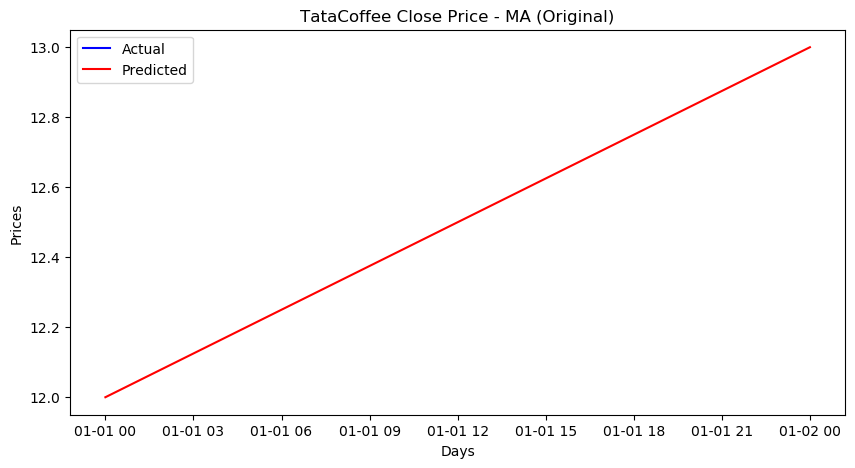

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_oriA[2000:2225], color='blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color='red', label="Predicted")
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - MA (Original)')
plt.legend()
plt.show()
